##Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Load the dataset


In [2]:
df = pd.read_csv("/content/Heart_Disease_Prediction.csv")

## About Dataset

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [6]:
#Check missing values
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [7]:
#Encode categorical variables
label_encoder = LabelEncoder()
df['Heart Disease'] = label_encoder.fit_transform(df['Heart Disease'])  #converted categorical column into number

In [8]:
# Split the data into features (X) and target variable (y)
X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize or normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Neural Network Architecture:

In [11]:
# Create model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model Training and Parameter Tuning:

In [13]:
# Train the ANN model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.33)


Epoch 1/50
15/15 [==============================] - 1s 19ms/step - loss: 0.9247 - accuracy: 0.3056 - val_loss: 0.9431 - val_accuracy: 0.3056
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.8574 - accuracy: 0.2917 - val_loss: 0.8857 - val_accuracy: 0.3472
Epoch 3/50
15/15 [==============================] - 0s 5ms/step - loss: 0.8087 - accuracy: 0.3056 - val_loss: 0.8430 - val_accuracy: 0.3889
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 0.7762 - accuracy: 0.3542 - val_loss: 0.8116 - val_accuracy: 0.4028
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.7495 - accuracy: 0.3681 - val_loss: 0.7872 - val_accuracy: 0.4444
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 0.7303 - accuracy: 0.4167 - val_loss: 0.7678 - val_accuracy: 0.4444
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.7145 - accuracy: 0.4861 - val_loss: 0.7523 - val_accuracy: 0.4722
Epoch 8/50
15/15 [=

## Model Evaluation

In [14]:
# evaluate the model
scores = model.evaluate(X_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

7/7 [==============================] - 0s 5ms/step - loss: 0.3806 - accuracy: 0.8426
accuracy: 84.26%


## Interpretation and Analysis

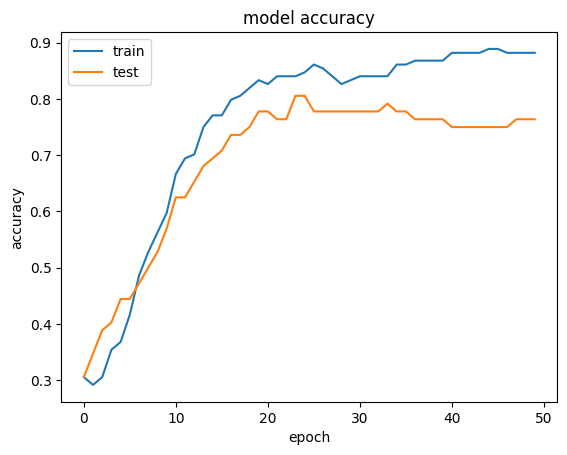

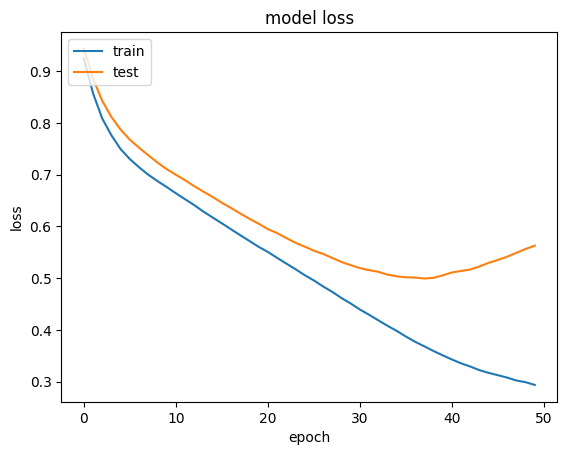

In [15]:
# Visualize the model's predictions and compare them with actual values
# Evaluate training history
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()